# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#base url pulled from the weather api site
url = "http://api.openweathermap.org/data/2.5/weather?"
#units set to imperial to get temp in f
units = "imperial"
#build the query url using the base url, api key, and units
query_url = f"{url}appid={weather_api_key}&units={units}&q="


In [5]:

# Make a json request for 500 cities
#build lists for the results to append into
data = []
city_data = []
city_lat = []
city_lon = []
max_tmp = []
humidity = []
wind_spd = []
clouds = []
country = []
date = []
# set a counter so that we return only 600 requests
i=0
#run a for loop to iterate 600 times, pulling data each time
#this will run for each city in the cities list generated by citypy
for city in (cities):
    if i<=600:
        print(f"Making request number: {i} for: {city}")
        i+=1
        #add the city name to the query url to return data from that city
        city_response=requests.get(query_url + city).json()
        #try to append data from the json request to the lists created above
        try:
            
            city_lat.append(city_response["coord"]["lat"])
            city_lon.append(city_response["coord"]["lon"])
            max_tmp.append(city_response["main"]["temp_max"])
            humidity.append(city_response["main"]["humidity"])
            clouds.append(city_response["clouds"]["all"])
            wind_spd.append(city_response["wind"]["speed"])
            country.append(city_response["sys"]["country"])
            date.append(city_response["dt"])
            city_data.append(city)
            #note the exceptions, if there is no data returned print a notification and move on to the next city
        except:
            print("City not found. Moving to next request.")
            pass
        #if the request yieled data, make a note and move to next city
print(f"Data for {city} added. Moving to next request")

Making request number: 0 for: illoqqortoormiut
City not found. Moving to next request.
Making request number: 1 for: hobart
Making request number: 2 for: rikitea
Making request number: 3 for: hienghene
Making request number: 4 for: pisco
Making request number: 5 for: mar del plata
Making request number: 6 for: bredasdorp
Making request number: 7 for: tuktoyaktuk
Making request number: 8 for: castro
Making request number: 9 for: melfort
Making request number: 10 for: bambous virieux
Making request number: 11 for: komsomolskiy
Making request number: 12 for: mehamn
Making request number: 13 for: umm lajj
Making request number: 14 for: barentsburg
City not found. Moving to next request.
Making request number: 15 for: lompoc
Making request number: 16 for: ushuaia
Making request number: 17 for: kangaatsiaq
Making request number: 18 for: yellowknife
Making request number: 19 for: dikson
Making request number: 20 for: pangody
Making request number: 21 for: bluff
Making request number: 22 for: 

Making request number: 183 for: cape town
Making request number: 184 for: maputo
Making request number: 185 for: vandra
Making request number: 186 for: saint george
Making request number: 187 for: kampot
Making request number: 188 for: pochutla
Making request number: 189 for: upernavik
Making request number: 190 for: coquimbo
Making request number: 191 for: guerrero negro
Making request number: 192 for: roebourne
Making request number: 193 for: port hedland
Making request number: 194 for: san ramon
Making request number: 195 for: harper
Making request number: 196 for: tubruq
City not found. Moving to next request.
Making request number: 197 for: copiapo
Making request number: 198 for: evensk
Making request number: 199 for: illapel
Making request number: 200 for: mount isa
Making request number: 201 for: rawson
Making request number: 202 for: antofagasta
Making request number: 203 for: san andres
Making request number: 204 for: alofi
Making request number: 205 for: yakeshi
Making reques

Making request number: 371 for: cherskiy
Making request number: 372 for: warri
Making request number: 373 for: gumdag
Making request number: 374 for: amursk
Making request number: 375 for: ramhormoz
Making request number: 376 for: bagdarin
Making request number: 377 for: gengenbach
Making request number: 378 for: kedrovoye
Making request number: 379 for: petropavlovsk-kamchatskiy
Making request number: 380 for: bathsheba
Making request number: 381 for: bilma
Making request number: 382 for: poya
Making request number: 383 for: laguna
Making request number: 384 for: hasaki
Making request number: 385 for: isangel
Making request number: 386 for: hofn
Making request number: 387 for: novoagansk
Making request number: 388 for: seoul
Making request number: 389 for: noumea
Making request number: 390 for: porto novo
Making request number: 391 for: saucillo
Making request number: 392 for: aksarka
Making request number: 393 for: paducah
Making request number: 394 for: aljezur
Making request number

Making request number: 560 for: mabaruma
Making request number: 561 for: otjiwarongo
Making request number: 562 for: puerto del rosario
Making request number: 563 for: xining
Making request number: 564 for: college
Making request number: 565 for: kamenka
Making request number: 566 for: koungou
Making request number: 567 for: temerloh
Making request number: 568 for: muros
Making request number: 569 for: halifax
Making request number: 570 for: domoni
Making request number: 571 for: lakes entrance
Making request number: 572 for: nelson bay
Making request number: 573 for: uige
Making request number: 574 for: issaquah
Making request number: 575 for: beruwala
Making request number: 576 for: kuche
City not found. Moving to next request.
Making request number: 577 for: marzuq
Making request number: 578 for: maltahohe
Making request number: 579 for: catabola
Making request number: 580 for: busko-zdroj
Making request number: 581 for: ilheus
Making request number: 582 for: westport
Making request

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
len(city_data)

553

In [7]:
#build a library of the data from the json requests
city_lib = ({"City": city_data,
           "Lat": city_lat,
           "Lon": city_lon,
           "Max Temperature (f)": max_tmp,
            "Humidity": humidity,
            "Wind Speed":wind_spd,
            "Clouds":clouds,
            "Country":country,
            "Date":date})

#make a data frame from the library and display it
city_df = pd.DataFrame(city_lib)
city_df.head()

,City,Lat,Lon,Max Temperature (f),Humidity,Wind Speed,Clouds,Country,Date
0,hobart,-42.88,147.33,60.80,48,8.05,90,AU,1580077042
1,rikitea,-23.12,-134.97,78.87,79,13.20,0,PF,1580077028
2,hienghene,-20.68,164.93,79.16,80,18.16,7,NC,1580077185
3,pisco,-13.70,-76.22,73.99,30,25.28,48,PE,1580076791
4,mar del plata,-38.00,-57.56,75.20,53,16.11,68,AR,1580076911


In [8]:
#convert the data file to a csv and save it
city_df.to_csv("city_data.csv",index=False,header=True)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

Graph shows relationship between Latitude and Maximum Recorded Temperture.  At higher northern latitudes the temperature is signifcantly lower than in the southern latitudes


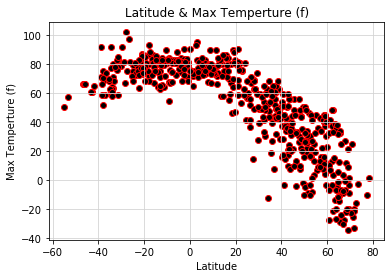

In [60]:
#plot the scatter
plt.scatter(city_df["Lat"],city_df["Max Temperature (f)"], edgecolors='red',facecolors="black")
#name the graph
plt.title("Latitude & Max Temperture (f)")
#plot x and y labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperture (f)")
#add a grid to the scatter
plt.grid (b=True, which="major", axis='both', linestyle='-',color='lightgrey')
#save the plot as a png
plt.savefig("Lat_v_Temp.png")
print("Graph shows relationship between Latitude and Maximum Recorded Temperture.  At higher northern latitudes the temperature is signifcantly lower than in the southern latitudes")

#### Latitude vs. Humidity Plot

Graph shows relationship between Latitude and Humidty.  Lower humidity zones and greater variation in humidity levels appear around the equator and in more souther latitudes. 


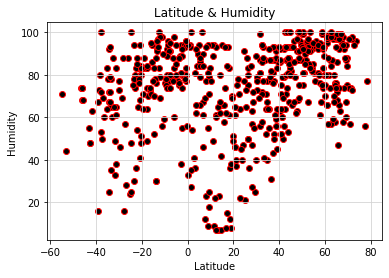

In [61]:
plt.scatter(city_df["Lat"],city_df["Humidity"], edgecolors='red',facecolors="black")
plt.title("Latitude & Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True, which="major", axis='both', linestyle='-',color='lightgrey')
plt.savefig("Lat_v_Hmdty.png")
print("Graph shows relationship between Latitude and Humidty.  Lower humidity zones and greater variation in humidity levels appear around the equator and in more souther latitudes. ")

#### Latitude vs. Cloudiness Plot

Graph shows the relationship between Latitude and Cloud Cover.  There does not appear to be a discernable pattern in cloud cover related to latitude.


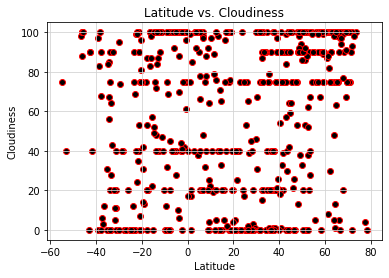

In [62]:
plt.scatter(city_df["Lat"],city_df["Clouds"], edgecolors='red',facecolors="black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True, which="major", axis='both', linestyle='-',color='lightgrey')
plt.savefig("Lat_v_Clouds.png")
print("Graph shows the relationship between Latitude and Cloud Cover.  There does not appear to be a discernable pattern in cloud cover related to latitude.")

#### Latitude vs. Wind Speed Plot

Graph shows relationship between Latitude and Wind Speed.  There seems to be a range of windspeeds that is normalized regardless of latitude and outliers occuring in most latitudes.


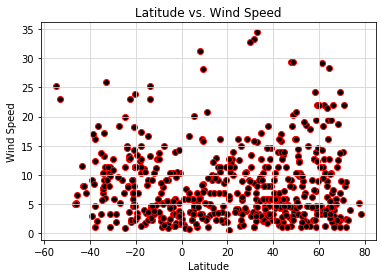

In [63]:
plt.scatter(city_df["Lat"],city_df["Wind Speed"], edgecolors='red',facecolors="black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid (b=True, which="major", axis='both', linestyle='-',color='lightgrey')
plt.savefig("Lat_v_Wind.png")
print("Graph shows relationship between Latitude and Wind Speed.  There seems to be a range of windspeeds that is normalized regardless of latitude and outliers occuring in most latitudes.")

## Linear Regression

In [64]:
# OPTIONAL: Create a function to create Linear Regression plots


In [65]:
# Create Northern and Southern Hemisphere DataFrames
#create two dataframes, one for northern, one for southern hemisphere
south = city_df[city_df['Lat']<=0]
north = city_df[city_df['Lat']>=0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8480312664529281


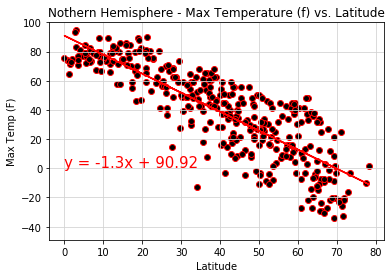

Graph shows a strong nexagive correlation bewteen temperature and latitude, as latitude increases north, max temperature decreases.


<Figure size 432x288 with 0 Axes>

In [66]:
#make a scatter plot of norther hemisphere latitude mapped against maximum temperature
plt.scatter(north["Lat"],north["Max Temperature (f)"],edgecolors="red",facecolors="black")
#title the plot
plt.title("Nothern Hemisphere - Max Temperature (f) vs. Latitude")
#label x and y axes
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
#set the y limit of the graph
plt.ylim(-49,100)
#add a grid overlay to the graph
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
#get linregress values
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Max Temperature (f)"])
regress_values = north["Lat"] * slope + intercept
#calculate the linear regression line equation
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot the line
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
#calculate r squared
print(f"The r-squared is: {rvalue}")
#print the plot
plt.show()
#save the plot as a png
plt.savefig("North_Lat_v_Temp.png")
print("Graph shows a strong nexagive correlation bewteen temperature and latitude, as latitude increases north, max temperature decreases.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4328011493514219


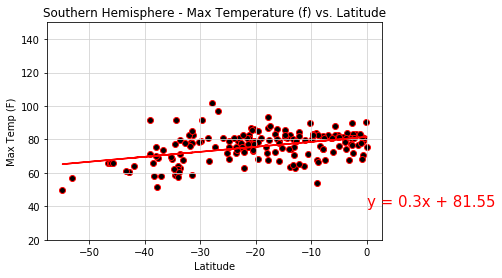

Graph shows a small positive correlation between southern latitude and max temperature, with max temperature increasing slightly as latitude approaches the equator.


<Figure size 432x288 with 0 Axes>

In [67]:
plt.scatter(south["Lat"],south["Max Temperature (f)"],edgecolors="red",facecolors="black")
plt.title("Southern Hemisphere - Max Temperature (f) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.ylim(20,150)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Max Temperature (f)"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("South_Lat_v_Temp.png")
print("Graph shows a small positive correlation between southern latitude and max temperature, with max temperature increasing slightly as latitude approaches the equator.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.4119456827622686


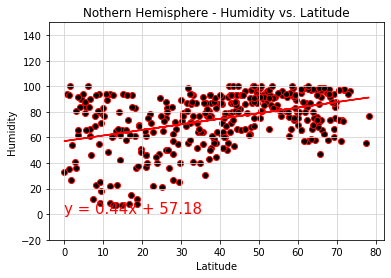

Graph shows a small positive correlation between northern latitude and humidity.  Humidity appears not to change drastically but increase slightly as norhtern latitude increases.


<Figure size 432x288 with 0 Axes>

In [68]:
plt.scatter(north["Lat"],north["Humidity"],edgecolors="red",facecolors="black")
plt.title("Nothern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(-20,150)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Humidity"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("North_Lat_v_Hmdty.png")
print("Graph shows a small positive correlation between northern latitude and humidity.  Humidity appears not to change drastically but increase slightly as norhtern latitude increases.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.37852652695266975


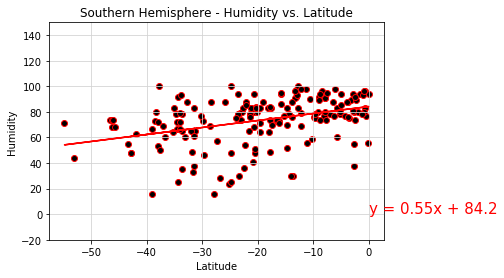

This graph shows a small positive correlation bewteen southern latitude and humidity.  Humidity increases slightly as latitude approaches the equator.


<Figure size 432x288 with 0 Axes>

In [69]:
plt.scatter(south["Lat"],south["Humidity"],edgecolors="red",facecolors="black")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.ylim(-20,150)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Humidity"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("South_Lat_v_Hmdty.png")
print("This graph shows a small positive correlation bewteen southern latitude and humidity.  Humidity increases slightly as latitude approaches the equator.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.31919508747676584


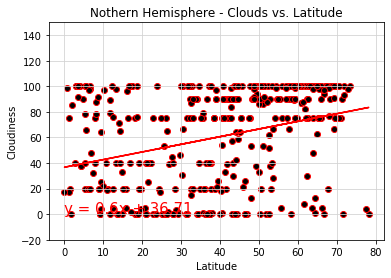

Graph shows a very low correlation between northern latitude and cloud cover.  Cloudiness increases slightly as northern latitude increases.


<Figure size 432x288 with 0 Axes>

In [70]:
plt.scatter(north["Lat"],north["Clouds"],edgecolors="red",facecolors="black")
plt.title("Nothern Hemisphere - Clouds vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(-20,150)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Clouds"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("North_Lat_v_Cloud.png")
print("Graph shows a very low correlation between northern latitude and cloud cover.  Cloudiness increases slightly as northern latitude increases.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1581129201313977


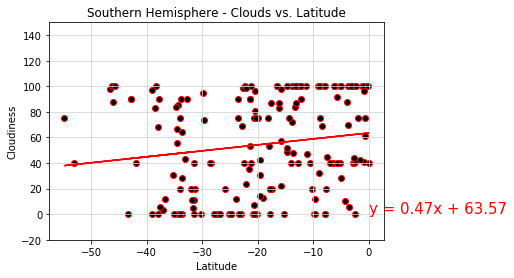

Graph shows almost no correlation between southern latitude and cloud cover.


<Figure size 432x288 with 0 Axes>

In [71]:
plt.scatter(south["Lat"],south["Clouds"],edgecolors="red",facecolors="black")
plt.title("Southern Hemisphere - Clouds vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.ylim(-20,150)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Clouds"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("South_Lat_v_Cloud.png")
print("Graph shows almost no correlation between southern latitude and cloud cover.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09809816679605096


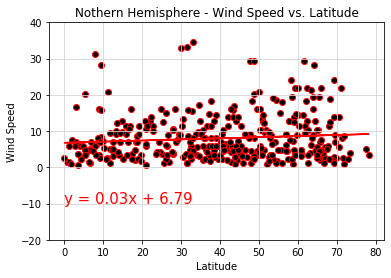

Graph shows no correlation between wind speed and northern latitude with almost no change as latitude increases.


<Figure size 432x288 with 0 Axes>

In [72]:
plt.scatter(north["Lat"],north["Wind Speed"],edgecolors="red",facecolors="black")
plt.title("Nothern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-20,40)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(north["Lat"], north["Wind Speed"])
regress_values = north["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,-10),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("North_Lat_v_Wind.png")
print("Graph shows no correlation between wind speed and northern latitude with almost no change as latitude increases.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.2800742335625033


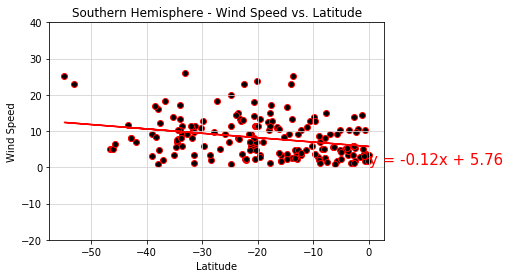

Graph shows a very small negative correlation bewteen southern latitude and wind speed, with windspeed slightly decreasing as latitude approaches the equator.


<Figure size 432x288 with 0 Axes>

In [73]:
plt.scatter(south["Lat"],south["Wind Speed"],edgecolors="red",facecolors="black")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(-20,40)
plt.grid (b=True, which="major", axis="both", linestyle="-",color="lightgrey")
(slope, intercept, rvalue, pvalue, stderr) = linregress(south["Lat"], south["Wind Speed"])
regress_values = south["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,1),fontsize=15,color="red")
print(f"The r-squared is: {rvalue}")
plt.show()
plt.savefig("South_Lat_v_Wind.png")
print("Graph shows a very small negative correlation bewteen southern latitude and wind speed, with windspeed slightly decreasing as latitude approaches the equator.")